In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
import librosa
import numpy as np
import csv
from sklearn.decomposition import PCA
from concurrent.futures import ProcessPoolExecutor

# importing data

In [2]:
data_dir = '../input/gtzan-dataset-music-genre-classification/Data/genres_original'

# WAV dataset TO Dataframe

In [3]:
# df_30 = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
# df_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [93]:
df_30 = pd.read_csv('/kaggle/working/data.csv').round(3)
df_30.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,disco.00031.wav,0.417,0.084,0.116,0.003,3257.127,388756.543,2898.084,93310.720,6681.101,...,46.933,-4.383,38.702,-3.657,49.484,-2.091,55.359,-0.310,57.257,disco
1,disco.00089.wav,0.430,0.078,0.100,0.001,2129.346,326462.072,2109.251,157488.153,4424.307,...,37.089,-10.317,38.489,0.562,42.145,-4.166,62.671,3.475,61.360,disco
2,disco.00079.wav,0.453,0.087,0.085,0.002,2292.578,429426.428,2348.190,98004.518,5038.611,...,43.150,-0.299,62.861,7.594,65.570,0.656,64.619,0.808,70.405,disco
3,disco.00030.wav,0.450,0.080,0.170,0.005,3168.111,671472.084,3047.644,80215.867,6935.358,...,33.450,-4.743,31.194,-5.764,25.359,-4.029,25.143,-5.363,24.832,disco
4,disco.00060.wav,0.435,0.079,0.114,0.002,1975.227,350659.130,2090.041,180429.392,4251.483,...,41.155,-8.094,36.756,0.369,43.412,-3.240,56.399,3.585,61.408,disco


# the dataframe provide us with extracted features from the 30 sec wav files. Our features include :

- chroma_stft

- rms

- spectral centroid 

- mfcc

In [94]:
x = df_30.drop(['filename', 'label'], axis = 1)
y = df_30['label']

In [95]:
# x = df_30.drop(['filename', 'length', 'label'], axis = 1)
# y = df_30['label']

# **DATA VISUALISATION**


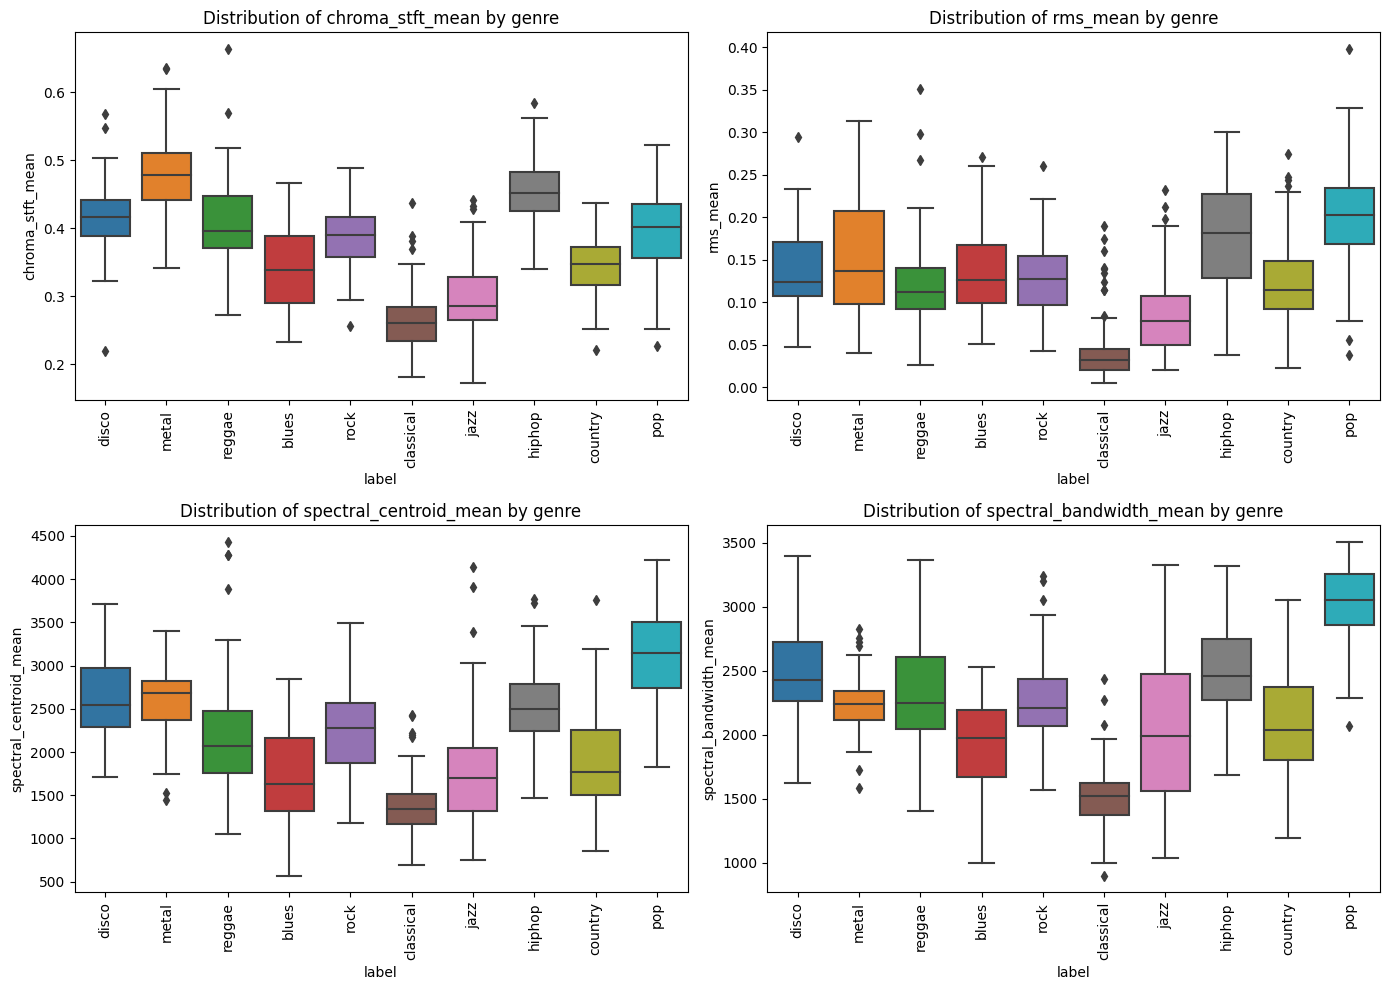

In [96]:
plt.figure(figsize=(14, 10))
features_to_plot = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='label', y=feature, data=df_30)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by genre')
plt.tight_layout()
plt.show()

# Normalizing Data

In [120]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x).round(3)

In [159]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [123]:
X = pd.DataFrame(X_scaled, columns = x.columns)

In [125]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.24508458, 0.21697412])

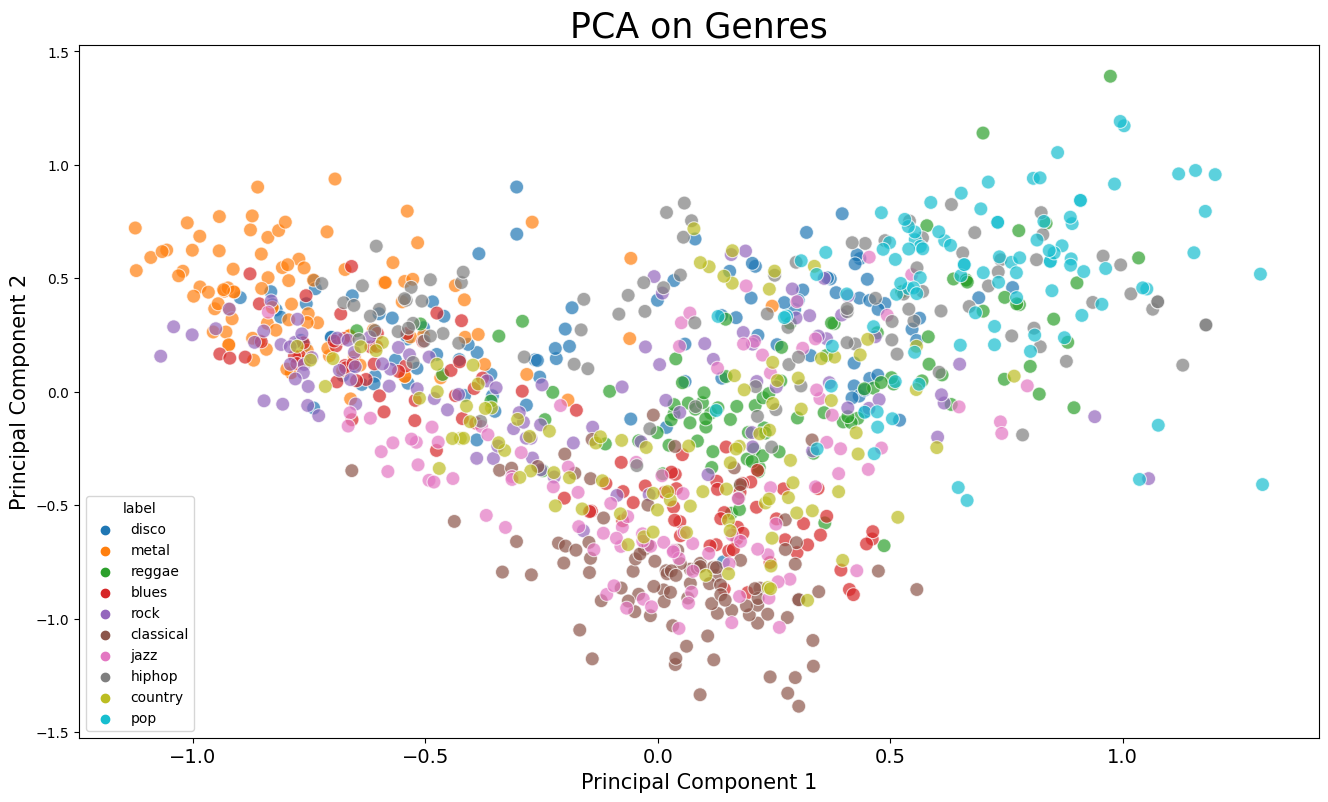

In [126]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Splitting data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Model

In [128]:
model = SVC(decision_function_shape='ovo')

In [129]:
model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [130]:
y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy 0.745
Classification Report: 
               precision    recall  f1-score   support

       blues       0.83      0.68      0.75        22
   classical       0.93      0.96      0.95        28
     country       0.80      0.73      0.76        22
       disco       0.60      0.71      0.65        21
      hiphop       0.68      0.79      0.73        19
        jazz       0.81      0.76      0.79        17
       metal       0.57      1.00      0.73        12
         pop       0.80      0.80      0.80        20
      reggae       0.82      0.58      0.68        24
        rock       0.50      0.40      0.44        15

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.76      0.74      0.74       200



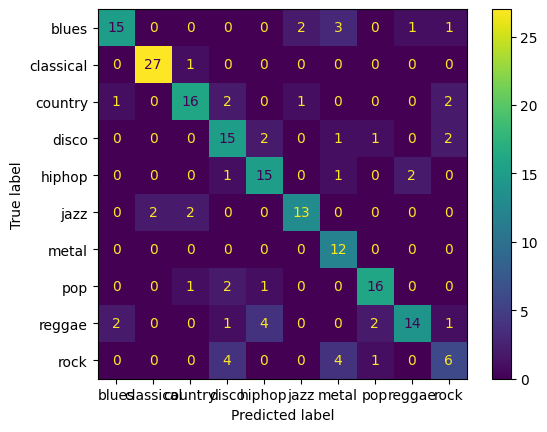

In [131]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='viridis')
plt.show()

# Optimization 

In [132]:
param_grid = {
    'C' : [0.1, 1, 10],
    'kernel' : ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'decision_function_shape' : ['ovo']
}

In [133]:
grid_search = GridSearchCV(SVC(decision_function_shape='ovo'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7246698113207548


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

       blues       0.79      0.86      0.83        22
   classical       0.93      0.93      0.93        28
     country       0.80      0.73      0.76        22
       disco       0.48      0.48      0.48        21
      hiphop       0.72      0.68      0.70        19
        jazz       0.93      0.82      0.87        17
       metal       0.92      1.00      0.96        12
         pop       0.77      0.85      0.81        20
      reggae       0.79      0.62      0.70        24
        rock       0.50      0.67      0.57        15

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



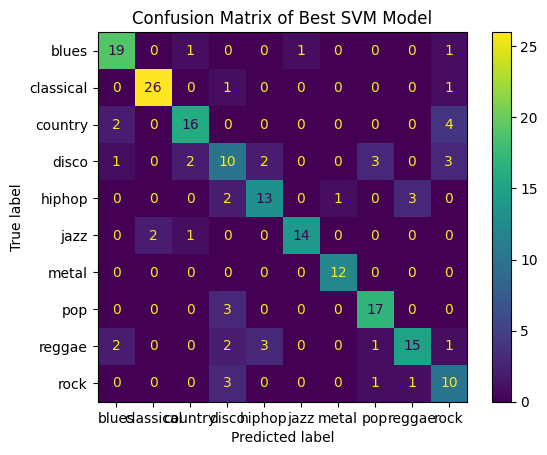

In [134]:
y_pred = grid_search.best_estimator_.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix of Best SVM Model")
plt.show()


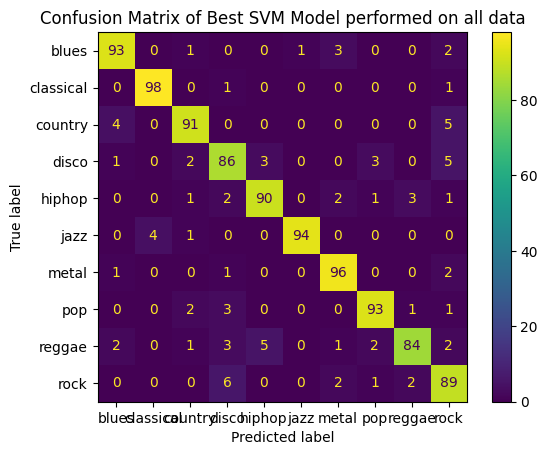

In [135]:
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, scaler.transform(x), y, cmap='viridis')
plt.title("Confusion Matrix of Best SVM Model performed on all data")
plt.show()

# EXPORT Best Model

In [136]:
joblib.dump(grid_search.best_estimator_, 'svm_model.pkl')

['svm_model.pkl']

# Deployment : use the WAV files to test the model

step 1 : extract features from the wav file using Librosa

In [137]:
def transform_wav_to_csv(sound_name, header_test):
    # create the csv file
    file = open('/kaggle/working/newsound.csv', 'w', newline = '')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_test)      
    # calculate the value of the librosa parameters
    y, sr = librosa.load(sound_name, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    # fill in the csv file
    file = open('kaggle/working/newsound.csv', 'a', newline = '')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
    # create test dataframe
    df_test = pd.read_csv('kaggle/working/newsound.csv')
    # each time you add a sound, a line is added to the test.csv file
    # if you want to display the whole dataframe, you can deselect the following line
    #st.write(df_test)
    return df_test

In [138]:
def extract_features(filename):
    # Load audio file
    y, sr = librosa.load(filename, duration=30)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    # Root Mean Square (RMS)
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_var = np.var(spectral_centroid)

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_var = np.var(spectral_bandwidth)

    # Spectral Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
    rolloff_mean = np.mean(rolloff)
    rolloff_var = np.var(rolloff)

    # Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    # Harmony (using librosa's harmonic-percussive separation)
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    harmony_var = np.var(harmonic)

    # Perceptual features (Perceptual spectral features can be approximated via MFCC)
    perceptual_mean = np.mean(harmonic)  # Placeholder, as perceptual features are not directly available in librosa
    perceptual_var = np.var(harmonic)  # Same placeholder

    # Tempo (beats per minute)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

    # Mel-frequency Cepstral Coefficients (MFCC)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_means = np.mean(mfcc, axis=1)
    mfcc_vars = np.var(mfcc, axis=1)

    # Combine all features into a list (array)
    features = [
        chroma_stft_mean,
        chroma_stft_var,
        rms_mean,
        rms_var,
        spectral_centroid_mean,
        spectral_centroid_var,
        spectral_bandwidth_mean,
        spectral_bandwidth_var,
        rolloff_mean,
        rolloff_var,
        zero_crossing_rate_mean,
        zero_crossing_rate_var,
        harmony_mean,
        harmony_var,
        perceptual_mean,
        perceptual_var,
        tempo[0]
    ]
    
    for i in range(0, 20):
        features.append(mfcc_means[i])
        features.append(mfcc_vars[i])

#     return features
    return np.array(features).reshape(1, -1)

In [139]:
def process_song(song_path, genre):
    try:
        features = extract_features(song_path)
        features.insert(0, song_path.split('/')[-1]) 
        features.append(genre)  # Genre label
        return features
    except Exception as e:
        print(f"Error processing {song_path}: {e}")
        return None

In [140]:
def transform_wav_to_dataframe(data_dir):

    columns = ['filename', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
               'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean',
               'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean',
               'zero_crossing_rate_var', 'harmony_mean', 'harmony_var','perceptr_mean', 'perceptr_var', 'tempo']
    for i in range(20):
        columns.append(f'mfcc{i+1}_mean')
        columns.append(f'mfcc{i+1}_var')
    columns.append(f'label')
    df = pd.DataFrame(columns=columns)
    genre_folders = os.listdir(data_dir)

    # Loop through each genre folder
    for genre in genre_folders:
        genre_path = os.path.join(data_dir, genre)
        for song_index, song in enumerate(os.listdir(genre_path), 1): 
            song_path = os.path.join(genre_path, song)
            try:
                # Extract features
#                 print(f"  Processing song {song_index}/{len(os.listdir(genre_path))}: {song}")
                features = extract_features(song_path)
                # Append filename and genre label
                features.insert(0, song)  
                features.append(song.split('.')[0])    
                df = pd.concat([df, pd.DataFrame(np.array(features).reshape(1,-1), columns=columns)])
                print(df.shape)
            except Exception as e:
                print(f"Could not load {song}: {e}")
                continue      
    return df

step 2: predict class

In [141]:
# df = transform_wav_to_dataframe(data_dir)

# # Display the DataFrame
# print(df.head())

# df.to_csv('data.csv', index=False)

In [158]:
# Load the best saved model
best_model = joblib.load('/kaggle/working/svm_model.pkl')

# Extract features from the new WAV file
wav_file = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav'
features = extract_features(wav_file).round(3)
features_scaled = scaler.transform(features).round(3)
# Predict the genre
predicted_genre_label = best_model.predict(features_scaled)
print("Predicted Genre Label:", predicted_genre_label[0])

# Map label to genre if needed (assuming you have a dictionary for genre labels)
# genre_mapping = {0: 'blues', 1: 'classical', ...}  # Example
# print("Predicted Genre:", genre_mapping[predicted_genre_label[0]])


Predicted Genre Label: jazz


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
